In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> Статистические данные — упорядоченные, классифицированные данные о каком-то явлении или процессе.

Наша задача заключается в том, чтобы привести данные к статистическим с помощью мат.статистики

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Foxford/Андрей/cleared_titanic.csv')
data.head()

,Survived,Pclass,Age,Fare,Sex,Embarked
0,0,3,22.0,7.2500,1,1
1,1,1,38.0,71.2833,0,2
2,1,3,26.0,7.9250,0,1
3,1,1,35.0,53.1000,0,1
4,0,3,35.0,8.0500,1,1


In [5]:
data.describe()

,Survived,Pclass,Age,Fare,Sex,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,32.204208,0.647587,1.361392
std,0.486592,0.836071,13.019697,49.693429,0.477990,0.635673
min,0.000000,1.000000,0.420000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,7.910400,0.000000,1.000000
50%,0.000000,3.000000,28.000000,14.454200,1.000000,1.000000
75%,1.000000,3.000000,35.000000,31.000000,1.000000,2.000000
max,1.000000,3.000000,80.000000,512.329200,1.000000,3.000000


In [26]:
list_of_ages = data['Age'].tolist()
list_of_ages.sort()
print('Минимальный возраст пассажира равен - {}'.format(list_of_ages[0]))

Минимальный возраст пассажира равен - 0.42


In [9]:
print('Минимальный возраст пассажира равен - {}'.format(data['Age'].min()))

Минимальный возраст пассажира равен - 0.42


In [29]:
import statistics

In [30]:
print('Медиана класса обслуживания равняется - {}'.format(statistics.median(data['Pclass'])))

Медиана класса обслуживания равняется - 3


<Axes: xlabel='Pclass'>

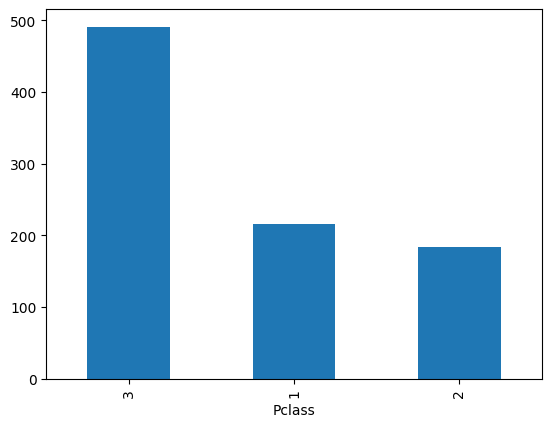

In [31]:
data['Pclass'].value_counts().plot(kind='bar')

> Медиана всегда следует за выбросами

In [33]:
print('Среднее значение для столбца Survived равняется {:.3f}'.format(data['Survived'].mean()))

Среднее значение для столбца Survived равняется 0.384


In [35]:
print('Медианное значение для столбца Survived равняется {}'.format(statistics.median(data['Survived'])))

Медианное значение для столбца Survived равняется 0


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

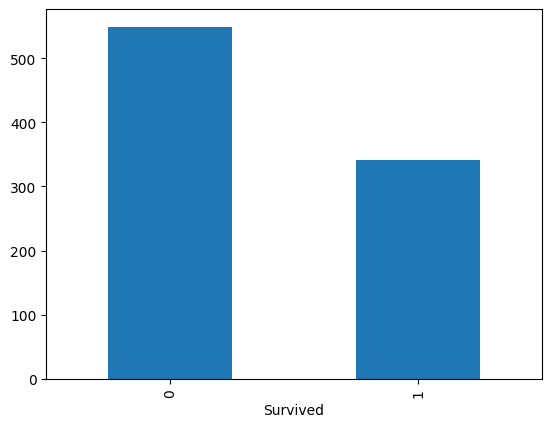

In [39]:
data['Survived'].value_counts().plot(kind='bar');
data['Survived'].value_counts(normalize=True)


In [41]:
print('Наиболее частовстречающееся значения пола - {}'.format('Мужчина' if statistics.mode(data['Sex']) == 1 else 'Женщина'))

Наиболее частовстречающееся значения пола - Мужчина


> Если коэффициент корреляции больше по модулю чем 0.7 (больше чем 0.7, либо меньше чем -0.7), то принято считать, что данные два столбца гиперкоррелированны -> следовательно нужно избавить от одного из столбцов в данных.

In [43]:
round(data.corr(), 3)

,Survived,Pclass,Age,Fare,Sex,Embarked
Survived,1.000,-0.338,-0.065,0.257,-0.543,0.107
Pclass,-0.338,1.000,-0.340,-0.549,0.132,0.046
Age,-0.065,-0.340,1.000,0.097,0.081,-0.009
Fare,0.257,-0.549,0.097,1.000,-0.182,0.062
Sex,-0.543,0.132,0.081,-0.182,1.000,-0.117
Embarked,0.107,0.046,-0.009,0.062,-0.117,1.000


In [45]:
data2 = pd.read_csv('/content/drive/MyDrive/Foxford/Андрей/titanic.csv')
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
data2.corr(method='spearman', numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041010,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.052565,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.361666,-0.043019,-0.022801,-0.688032
Age,0.041010,-0.052565,-0.361666,1.000000,-0.182061,-0.254212,0.135051
SibSp,-0.061161,0.088879,-0.043019,-0.182061,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.254212,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.135051,0.447113,0.410074,1.000000


Для поиска корреляций между категориальными числовыми признаками используем корреляцию Спирмена

In [50]:
data[['Age', 'Pclass', 'Survived']].corr(method='spearman', numeric_only=True)

,Age,Pclass,Survived
Age,1.000000,-0.317406,-0.037004
Pclass,-0.317406,1.000000,-0.339668
Survived,-0.037004,-0.339668,1.000000


Корреляция Кендалла используется когда в данных есть выбросы, или пустые значения. Она не чувствительна к проблемам в данных, в то время как корреляции Пирсона и Спирмена - чувствительны

In [51]:
data[['Age', 'Pclass', 'Survived']].corr(method='kendall', numeric_only=True)

,Age,Pclass,Survived
Age,1.000000,-0.254206,-0.031055
Pclass,-0.254206,1.000000,-0.323533
Survived,-0.031055,-0.323533,1.000000


In [52]:
data['Pclass_1'] = data['Pclass'].apply(lambda x: 1 if x == 1 else 0)

In [53]:
data.head()

,Survived,Pclass,Age,Fare,Sex,Embarked,Pclass_1
0,0,3,22.0,7.2500,1,1,0
1,1,1,38.0,71.2833,0,2,1
2,1,3,26.0,7.9250,0,1,0
3,1,1,35.0,53.1000,0,1,1
4,0,3,35.0,8.0500,1,1,0


ДЗ на 29.07:

1. Закодировать признак Pclass в 3 столбца со значениями - 1 или 0 (бинарное кодирование) - можешь провести вручную
2. Найти корреляцию Мэттьюса между признаком Survived и каждым из классов обслуживания

```python
!pip install scikit-learn

from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(x, y) - где x и y - некоторые данные столбцов с набором значений
```